#### Самостійна робота №1 
1) Заповнити двовимірний масив $m \times n$ випадковими цілими числами з відрізка $[a, b]$. Знайти значення індексів елементів масиву з мінімальним і максимальним значеннями.

2) Намалювати графік функції $y(x) = \cos (x) + \sqrt (x) - 2$ на відрізку $[a, b]$, а також графік цієї ж функції, але зміщений на величину $\Delta>0$ вправо. Виконати графіки різними стилями і використати легенди.

3) Побудувати функцію для обчислення значень полінома Лагерра $L_n(t_k)$ для $t_k = \Delta t* k, \quad k = \overline{0, m},$ за рекурентною формулою

$$L_0(x)=1, \quad L_1(x)=1-x,$$

$$L_n(x)=\frac{2n-1-x}{n}L_{n-1}(x)-\frac{n-1}{n} L_{n-2}(x), \quad n \geq 2.$$

4) Намалювати графіки поліномів Лагерра $L_n(t)$ для $n=\overline{0, N}$ на інтервалі $[0,  T]$.


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

## First

In [4]:
a = int(input("a: "))
a

1

In [5]:
b = int(input("b: "))
b

10

In [6]:
m = int(input('m'))
m

6

In [7]:
n = int(input('n'))
n

6

In [8]:
matrix = np.random.randint(a, b+1, size=(m, n))
matrix

array([[1, 5, 4, 2, 1, 4],
       [1, 8, 9, 4, 3, 2],
       [5, 5, 6, 2, 1, 5],
       [1, 4, 1, 1, 1, 7],
       [3, 2, 7, 4, 3, 9],
       [5, 1, 4, 1, 1, 7]])

In [9]:
max_index_row = np.argmax(matrix, axis=1)
print('max index in each row:', *max_index_row)

max index in each row: 1 2 2 5 5 5


In [10]:
min_index_row = np.argmin(matrix, axis=1)
print('min index in each row:', *min_index_row)

min index in each row: 0 0 4 0 1 1


## Second

In [11]:
delta = int(input('delta'))
delta

2

In [26]:
def f(a, b):
    rez = []
    for i in range(a, b+1):
        rez.append(np.cos(i) + np.sqrt(i) - 2)
    return rez

rez = f(a, b)
rez

[-0.45969769413186023,
 -1.0019332741740472,
 -1.2579416890315682,
 -0.6536436208636118,
 0.519730162963016,
 1.4096600294335437,
 1.3996535654078954,
 0.6829270909375769,
 0.08886973811532295,
 0.323206131091927]

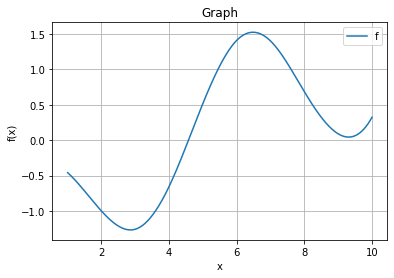

In [34]:
x_s = np.linspace(a, b, 300)
x_ySpline = interpolate.make_interp_spline(list(np.arange(a, b+1)), rez)
y_s = x_ySpline(x_s)

fig, ax = plt.subplots();
ax.plot(x_s, y_s)
plt.legend('f(x)')
ax.set(xlabel='x', ylabel='f(x)', title='Graph')
ax.grid()
plt.show()

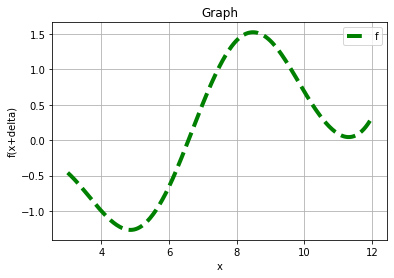

In [33]:
x_s = np.linspace(a+delta, b+delta, 300)
x_ySpline = interpolate.make_interp_spline(list(np.arange(a+delta, b+1+delta)), rez)
y_s = x_ySpline(x_s)

fig, ax = plt.subplots();
ax.plot(x_s, y_s, linewidth=4, color="green",linestyle="--")
plt.legend('f(x+delta)')
ax.set(xlabel='x', ylabel='f(x+delta)', title='Graph')
ax.grid()
plt.show()

## Third

In [13]:
m = int(input("m: "))
m

7

In [14]:
k = np.arange(0, m+1)
k

array([0, 1, 2, 3, 4, 5, 6, 7])

In [15]:
deltat = int(input("deltat: "))
deltat

3

In [16]:
tk = k*deltat
tk

array([ 0,  3,  6,  9, 12, 15, 18, 21])

$$L_n(x)=\frac{2n-1-x}{n}L_{n-1}(x)-\frac{n-1}{n} L_{n-2}(x), \quad n \geq 2.$$

In [37]:
def Laguerre(tk, n):
    if n == 0:
        return 1
    elif n == 1:
        return 1 - tk
    else:
        return ((2* n - 1) * Laguerre(tk, n-1) - (n - 1) * Laguerre(tk, n - 2))/n

In [38]:
rez = []
n = 6
for k in range(0, len(tk)):
    rez.append([])
    for i in range(0, n):
        rez[k].append(Laguerre(tk[k], i))
rez

[[1, 1, 1.0, 1.0, 1.0, 1.0],
 [1, -2, -3.5, -4.5, -5.25, -5.85],
 [1, -5, -8.0, -10.0, -11.5, -12.7],
 [1, -8, -12.5, -15.5, -17.75, -19.55],
 [1, -11, -17.0, -21.0, -24.0, -26.4],
 [1, -14, -21.5, -26.5, -30.25, -33.25],
 [1, -17, -26.0, -32.0, -36.5, -40.1],
 [1, -20, -30.5, -37.5, -42.75, -46.95]]

## Fourth

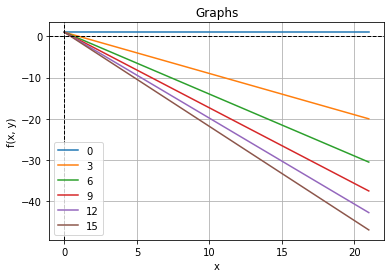

In [42]:
fig, ax = plt.subplots();
ax.plot(tk, rez)
plt.legend(tk)
ax.set(xlabel='x', ylabel='f(x, y)', title='Graphs')
ax.grid()
plt.axhline(color="black",linestyle="--", linewidth=1)
plt.axvline(color="black",linestyle="--", linewidth=1)

plt.show()